# Laptop Price

## Import Libraries & Load Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('laptop_prices.csv')
df

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,4,Windows 10,1.80,638.00,Full HD,1920,...,No,Intel,2.5,Core i7 6500U,128,0,SSD,No,Intel,HD Graphics 520
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,16,Windows 10,1.30,1499.00,Quad HD+,3200,...,No,Intel,2.5,Core i7 6500U,512,0,SSD,No,Intel,HD Graphics 520
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,2,Windows 10,1.50,229.00,Standard,1366,...,No,Intel,1.6,Celeron Dual Core N3050,64,0,Flash Storage,No,Intel,HD Graphics
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,6,Windows 10,2.19,764.00,Standard,1366,...,No,Intel,2.5,Core i7 6500U,1024,0,HDD,No,AMD,Radeon R5 M330


In [4]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'OS', 'Weight',
       'Price_euros', 'Screen', 'ScreenW', 'ScreenH', 'Touchscreen',
       'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_freq', 'CPU_model',
       'PrimaryStorage', 'SecondaryStorage', 'PrimaryStorageType',
       'SecondaryStorageType', 'GPU_company', 'GPU_model'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

## Exploratory Data Analysis - EDA

In [6]:
df.describe()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2048.000000,2048.000000


In [7]:
df.describe(include='object')

,Company,Product,TypeName,OS,Screen,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_model,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
count,1275,1275,1275,1275,1275,1275,1275,1275,1275,1275,1275,1275,1275,1275
unique,19,618,6,9,4,2,2,2,3,93,4,4,4,110
top,Dell,XPS 13,Notebook,Windows 10,Full HD,No,No,No,Intel,Core i5 7200U,SSD,No,Intel,HD Graphics 620
freq,291,30,707,1048,835,1087,918,1258,1214,193,837,1067,704,279


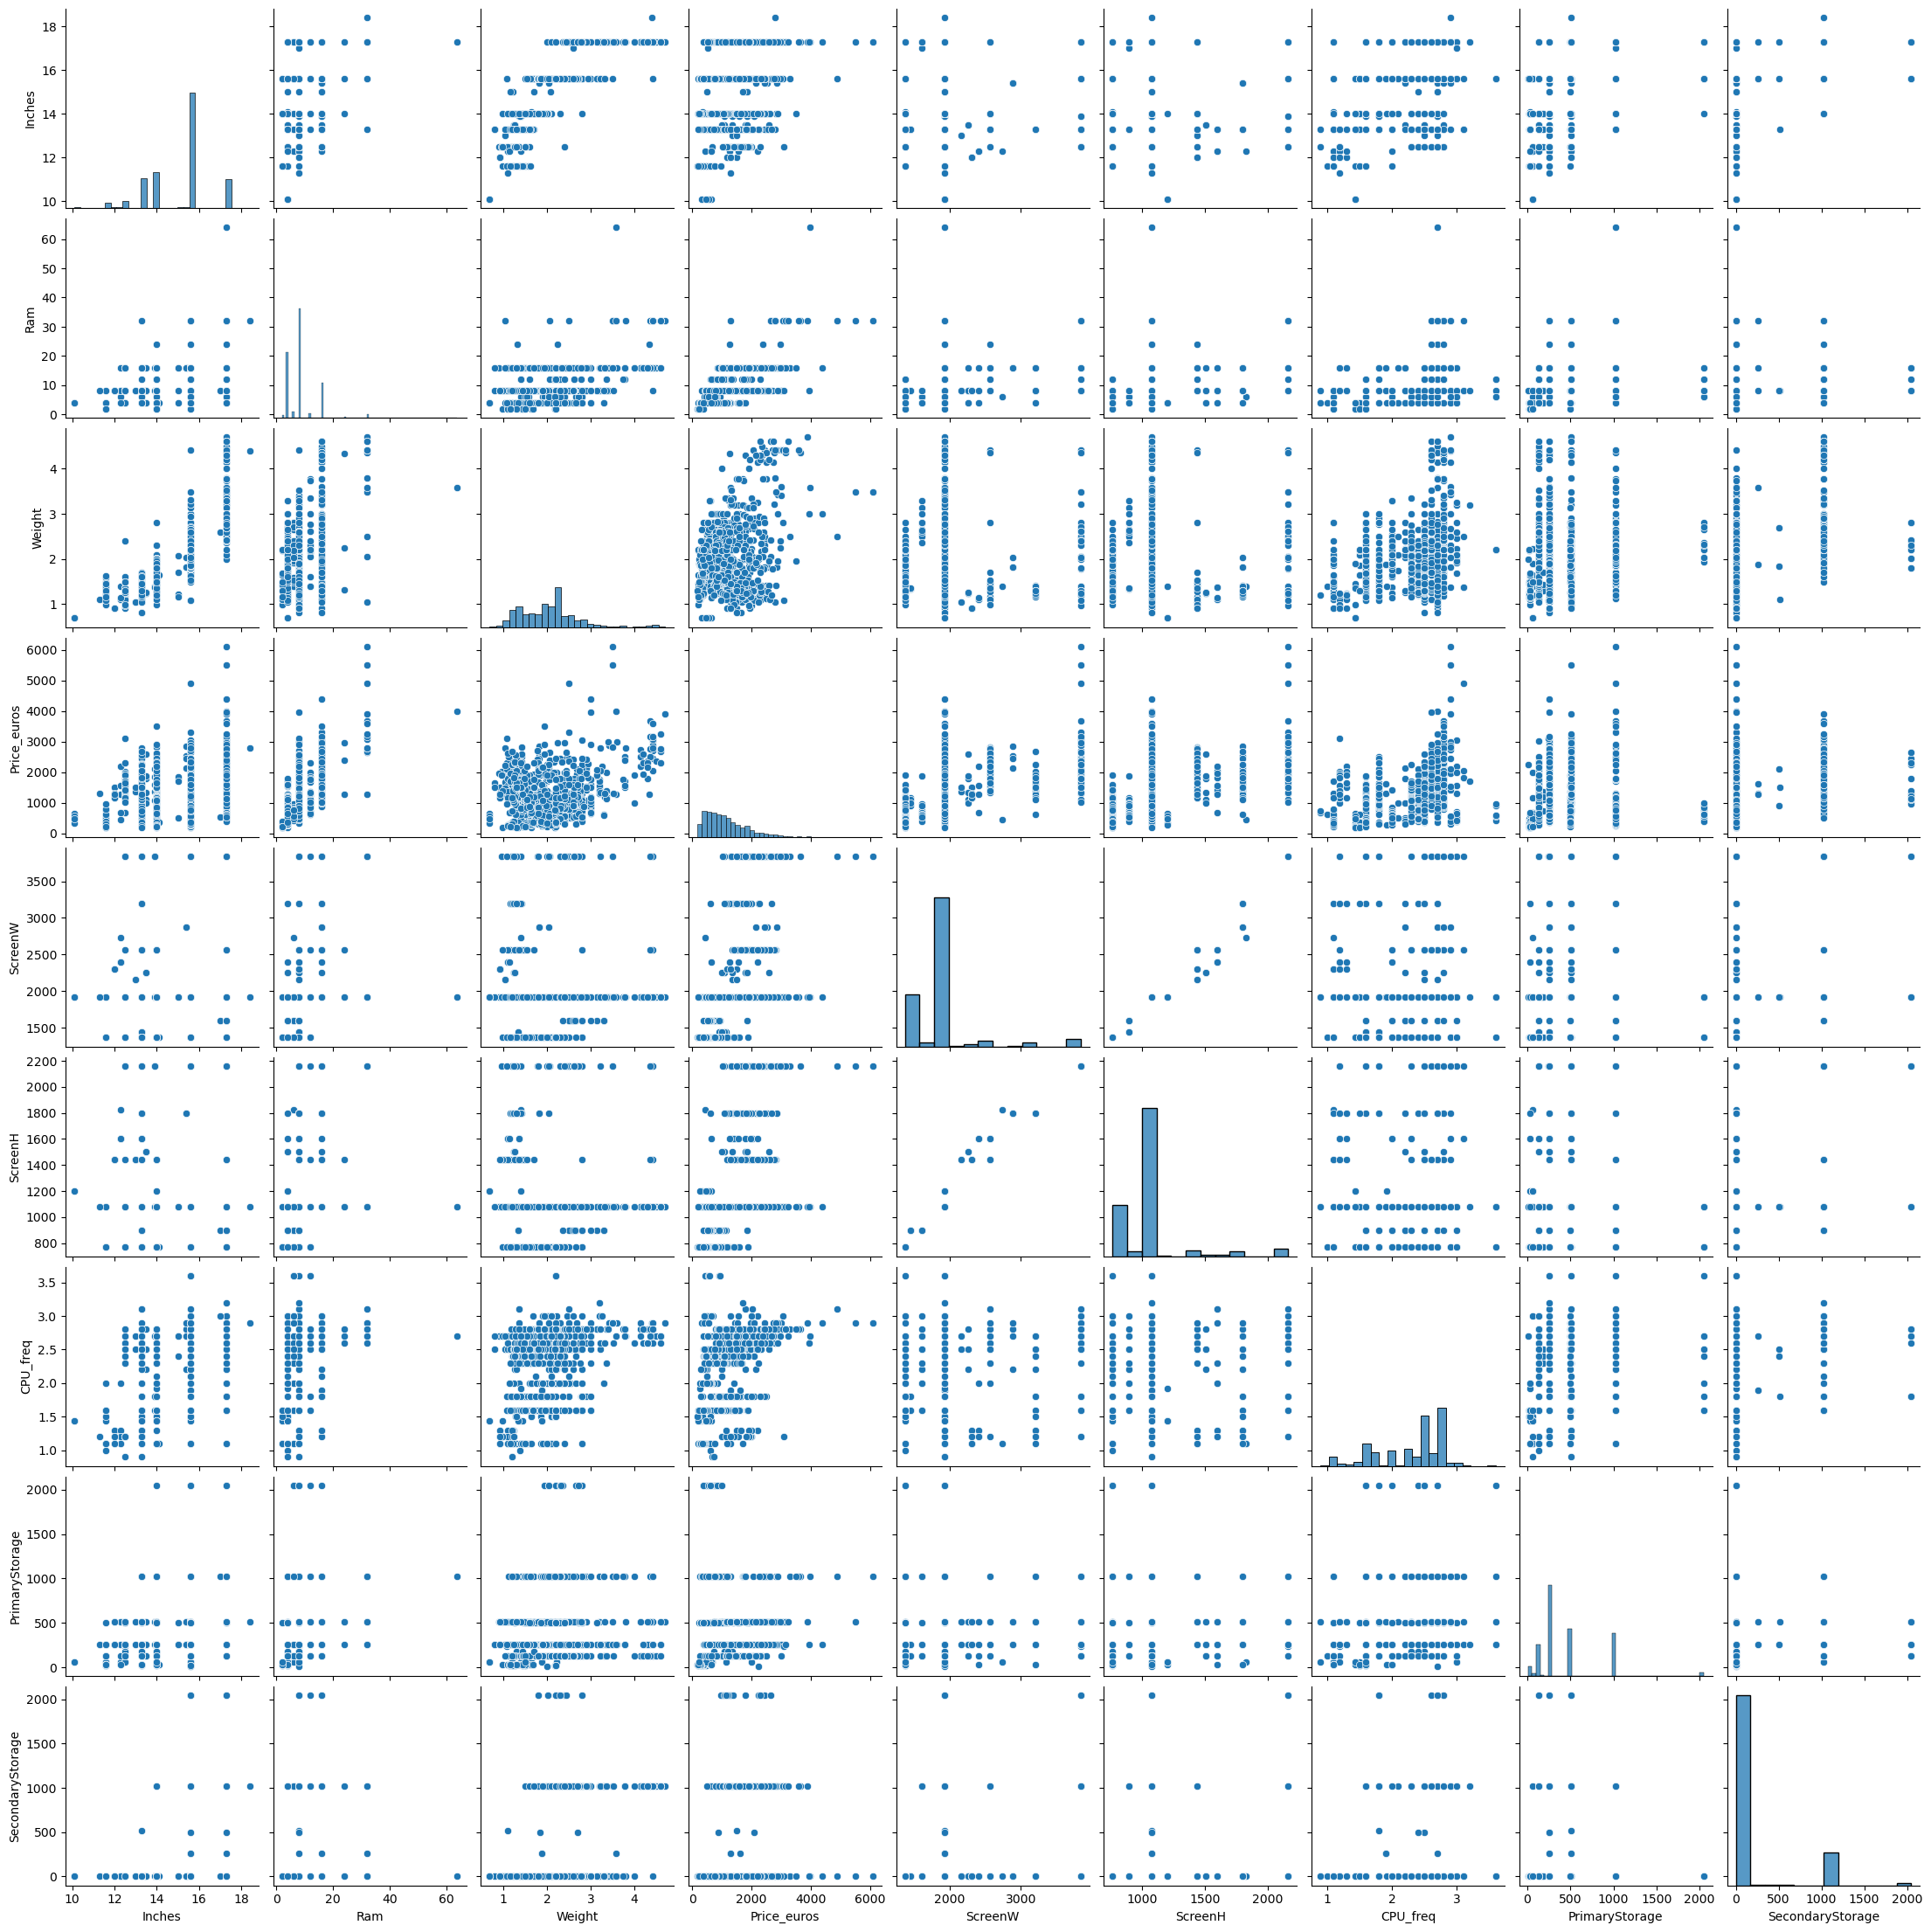

In [8]:
sns.pairplot(df)

['Intel' 'AMD' 'Samsung']


<BarContainer object of 3 artists>

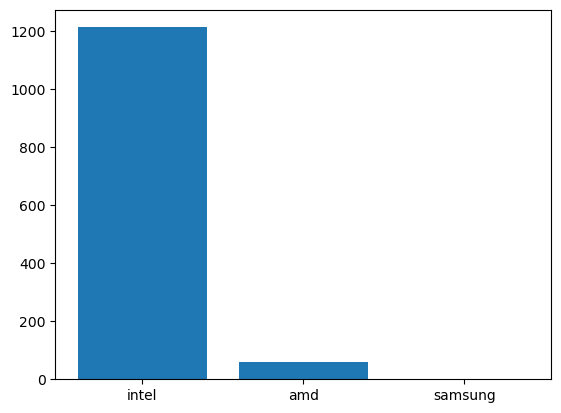

In [8]:
print(df['CPU_company'].unique())
intel = sum(df['CPU_company'] == "Intel")
amd = sum(df['CPU_company'] == "AMD")
samsung = sum(df['CPU_company'] == "Samsung")
plt.bar(['intel', 'amd', 'samsung'], [intel, amd, samsung])


In [9]:
df.isna().sum()

Company                 0
Product                 0
TypeName                0
Inches                  0
Ram                     0
OS                      0
Weight                  0
Price_euros             0
Screen                  0
ScreenW                 0
ScreenH                 0
Touchscreen             0
IPSpanel                0
RetinaDisplay           0
CPU_company             0
CPU_freq                0
CPU_model               0
PrimaryStorage          0
SecondaryStorage        0
PrimaryStorageType      0
SecondaryStorageType    0
GPU_company             0
GPU_model               0
dtype: int64

In [10]:
df.duplicated().sum()

0

## Prepare Data

In [11]:
from sklearn.model_selection import train_test_split
x = df.drop(columns='Price_euros')
y = df['Price_euros']

x = x.to_numpy()
y = y.to_numpy()

train_X, test_X, train_y, test_y = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=42)
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)


(1020, 22)
(1020,)
(255, 22)
(255,)


In [12]:
columns = df.drop(columns='Price_euros').columns
trian_df = pd.DataFrame(train_X, columns=columns)
test_df = pd.DataFrame(test_X, columns=columns)

In [13]:
numerical = ['Inches', 'Weight', 'ScreenW', 'ScreenH', 'CPU_freq', 'PrimaryStorage', 'SecondaryStorage']
category = [i for i in columns if i not in numerical ]
num_df = trian_df[numerical].astype(float)
cat_df = trian_df[category]

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

std = StandardScaler()
num_df = std.fit_transform(num_df)

In [15]:
le = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
cat_df = le.fit_transform(cat_df)

In [16]:
train_df = np.concatenate([cat_df, num_df], axis=1)

In [21]:
y.shape

(1275,)

In [17]:
numerical = ['Inches', 'Weight', 'ScreenW', 'ScreenH', 'CPU_freq', 'PrimaryStorage', 'SecondaryStorage']
category = [i for i in columns if i not in numerical ]
num_df = test_df[numerical].astype(float)
cat_df = test_df[category]
num_df = std.transform(num_df)
cat_df = le.transform(cat_df)
test_df = np.concatenate([cat_df, num_df], axis=1)

In [22]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_df, train_y)

LinearRegression()

In [25]:
lr.predict(train_df)

array([1228.47337178, 1872.85703311,  763.63154269, ...,  952.29717068,
       1177.00027244,  706.58734394])

In [26]:
from sklearn.metrics import root_mean_squared_error
root_mean_squared_error(train_y, lr.predict(train_df))

383.01870411461795

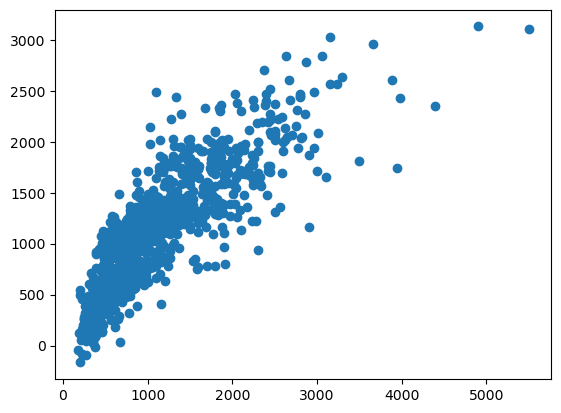

In [34]:
plt.scatter(train_y, lr.predict(train_df))

In [35]:
root_mean_squared_error(test_y, lr.predict(test_df))

393.2114322590642

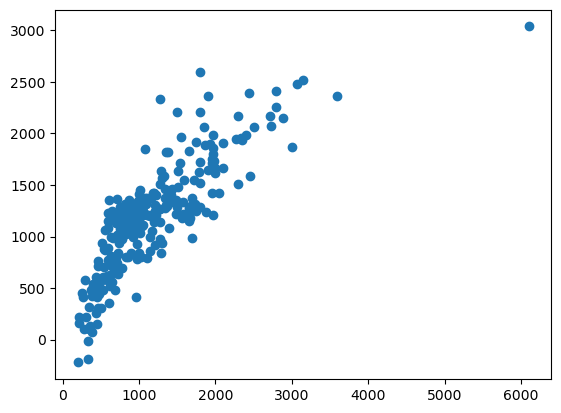

In [37]:
plt.scatter(test_y, lr.predict(test_df))

In [38]:
from sklearn.metrics import r2_score
r2_score(test_y, lr.predict(test_df))

0.6884888254497021

In [46]:
from scipy import stats
from scipy.stats import t
confidence = 0.95
se = (test_y - lr.predict(test_df)) ** 2
t.interval(0.95, len(se - 1), loc=se.mean(), scale=stats.sem(se))

(79546.11582997322, 229684.3450884761)